#Import train and test dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving phpYLeydd_test.csv to phpYLeydd_test.csv
Saving phpYLeydd_train_18.csv to phpYLeydd_train_18.csv


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import io
train_data = pd.read_csv('phpYLeydd_train_18.csv',header=None)
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0.008346,-0.016544,-0.000584,0.018588,-0.002503,-0.002022,0.000917,-0.018711,0.000108,0.029082,-0.008429,-0.000587,0.001788,-0.000220,-0.000750,0.004913,-3.562130e-03,-0.000309,-0.000025,0.000343,-0.000197,0.011547,-0.000823,-2.391400e-04,0.018539,0.018865,0.018734,0.030285,0.001951,0.006077,0.000396,0.011579,'S'
1,-0.000773,-0.000136,-0.000041,0.002219,0.000013,0.000033,-0.000583,0.000002,0.000009,0.002068,-0.000233,0.000106,-0.000151,-0.000018,0.000042,-0.000033,-2.635600e-04,-0.000049,-0.000174,-0.000027,0.000036,-0.000043,-0.000196,-3.744000e-05,0.000786,0.002220,0.000583,0.002084,0.000158,0.000270,0.000180,0.000204,'D'
2,-0.001440,-0.000350,0.000107,0.000780,-0.000978,0.000275,-0.000125,0.000020,0.000056,0.000639,-0.000585,0.000310,0.000191,0.000045,-0.000006,-0.000029,2.930000e-05,-0.000005,0.000152,0.000079,-0.000012,-0.000069,0.000066,-2.764000e-05,0.001486,0.001281,0.000139,0.000920,0.000197,0.000041,0.000172,0.000099,'D'
3,0.004270,0.008361,-0.001687,-0.010561,0.016419,-0.000317,0.003971,0.008616,-0.001576,0.004487,0.014219,-0.000491,-0.006573,-0.000049,0.000756,-0.001251,-7.895300e-04,0.000368,-0.004987,-0.000257,0.000605,-0.000547,-0.000277,8.166000e-05,0.009538,0.019525,0.009617,0.014918,0.006616,0.001524,0.005030,0.000618,'S'
4,-0.004431,0.004527,0.000163,-0.000289,0.000291,-0.000409,-0.002226,0.001852,0.000096,0.000259,0.000338,-0.000264,0.000487,-0.000521,-0.000009,0.000032,-2.700000e-07,0.000024,0.000004,-0.000011,-0.000007,-0.000005,-0.000003,1.517000e-05,0.006337,0.000579,0.002897,0.000501,0.000713,0.000040,0.000014,0.000016,'D'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,-0.001186,-0.007143,0.007498,0.009834,-0.001015,0.018924,-0.001056,-0.007514,-0.001784,0.011010,0.001217,-0.000015,-0.000357,0.000173,-0.001556,0.000885,1.589330e-03,0.003662,-0.000271,-0.000039,-0.002036,-0.000271,0.000415,1.254800e-03,0.010423,0.021350,0.007795,0.011077,0.001605,0.004089,0.002055,0.001349,'S'
7865,-0.001336,-0.000004,0.000166,-0.000150,0.001258,-0.000139,-0.001695,0.000456,0.000255,-0.000141,0.001221,-0.000135,0.000760,0.001016,-0.000092,0.000008,-1.300000e-05,0.000001,0.000758,0.001053,-0.000081,0.000008,-0.000010,8.400000e-07,0.001346,0.001274,0.001774,0.001237,0.001272,0.000016,0.001301,0.000013,'D'
7866,0.004649,0.004373,-0.000139,0.003535,-0.000603,-0.000071,-0.001582,0.007236,-0.000261,0.001646,-0.000116,-0.000086,0.000121,0.000271,0.000024,0.000480,2.836000e-05,0.000025,-0.000999,0.002573,-0.000133,0.000234,0.000136,2.176000e-05,0.006384,0.003587,0.007411,0.001652,0.000298,0.000481,0.002764,0.000271,'D'
7867,0.001377,-0.000434,-0.000367,-0.000734,-0.000654,-0.000096,0.001360,-0.000459,-0.000380,-0.000737,-0.000653,-0.000097,-0.001280,-0.001845,0.000274,-0.000238,-1.171400e-04,-0.000027,-0.000744,-0.002308,0.000315,-0.000238,-0.000118,-2.709000e-05,0.001490,0.000988,0.001485,0.000989,0.002262,0.000267,0.002445,0.000266,'D'


In [ ]:
test_data=pd.read_csv('phpYLeydd_test.csv',header=None)
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,-0.024427,0.006105,-0.009190,0.009911,0.003952,0.022503,-0.020666,0.008078,-0.006453,0.009038,-0.001229,0.028208,-0.001282,0.000572,0.003312,0.002689,0.000078,-0.005778,-0.000221,-0.001157,-0.005485,0.002440,-0.001371,-0.004229,0.026803,0.024904,0.023108,0.029646,0.003597,0.006373,0.005610,0.005071,'S'
1,-0.004975,0.037317,-0.000169,-0.008475,-0.018003,0.000343,-0.000847,0.029391,-0.000093,-0.005268,-0.011992,0.000034,0.000259,0.000682,0.000015,0.000678,-0.000060,-0.000140,0.000135,-0.001107,-0.000180,0.000533,0.000013,-0.000122,0.037648,0.019901,0.029403,0.013098,0.000730,0.000695,0.001130,0.000547,'S'
2,0.004199,-0.004871,0.007259,0.004396,-0.007048,0.008402,0.006191,-0.010978,0.007110,0.003973,-0.004095,0.009278,0.002711,-0.008731,0.000301,0.001810,0.002298,0.000578,-0.000035,-0.003562,0.000198,0.000803,-0.003253,0.000269,0.009698,0.011815,0.014471,0.010892,0.009148,0.002981,0.003567,0.003362,'S'
3,-0.000579,-0.004085,0.000015,-0.011690,-0.000814,-0.001949,0.000248,0.001156,0.000126,-0.011016,-0.000596,-0.002330,-0.000068,-0.000074,0.000035,0.000657,-0.000049,-0.000047,0.000010,-0.000115,0.000041,0.000409,0.000451,0.000103,0.004126,0.011879,0.001189,0.011276,0.000106,0.000660,0.000123,0.000617,'S'
4,-0.002929,-0.001741,-0.000287,0.004772,-0.012481,0.002615,-0.006595,-0.002301,0.000360,-0.001412,-0.010184,0.000158,0.000141,0.000062,0.000055,-0.000921,-0.000623,-0.000157,0.000424,0.000467,-0.000145,-0.000848,-0.002033,-0.000161,0.003420,0.013616,0.006994,0.010282,0.000164,0.001123,0.000647,0.002208,'P'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,0.000444,-0.000855,-0.000432,0.003102,-0.000173,0.000014,0.000028,0.000745,-0.000316,-0.000027,-0.000368,-0.000281,0.000145,0.000100,-0.000019,0.000188,-0.000209,0.000034,0.000107,0.000086,-0.000026,0.000142,0.000225,0.000004,0.001056,0.003107,0.000809,0.000464,0.000177,0.000283,0.000140,0.000266,'D'
2000,0.005760,-0.006641,-0.002260,-0.002855,-0.008738,-0.002295,0.002331,-0.006528,-0.001527,-0.000823,-0.006350,-0.001135,0.000166,0.000953,0.000013,-0.000202,0.000568,0.000026,0.000309,0.000470,-0.000054,-0.000189,0.000115,-0.000075,0.009077,0.009474,0.007098,0.006503,0.000968,0.000604,0.000565,0.000234,'R'
2001,0.000167,-0.025493,-0.000543,0.003275,0.001768,-0.000491,0.000414,-0.020334,0.000153,0.002887,0.000980,-0.000508,-0.000397,0.000104,-0.000232,0.000032,0.000477,-0.000055,-0.000491,0.000548,-0.000244,0.000093,0.000267,-0.000038,0.025500,0.003754,0.020339,0.003090,0.000472,0.000481,0.000775,0.000285,'P'
2002,-0.001842,-0.004095,0.000595,-0.025661,0.003843,0.000059,-0.001862,-0.004079,0.000603,-0.023326,0.006599,0.001116,-0.004344,-0.006896,0.001046,0.000403,-0.000012,0.000046,-0.003936,-0.006373,0.000954,0.000338,0.000817,0.000142,0.004530,0.025947,0.004524,0.024267,0.008217,0.000405,0.007551,0.000896,'S'


# Extract last column as output (Y) and rest as inputs (X) from both test and train sets

In [ ]:
train_data_X=train_data.iloc[:,:32]
train_data_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0.008346,-0.016544,-0.000584,0.018588,-0.002503,-0.002022,0.000917,-0.018711,0.000108,0.029082,-0.008429,-0.000587,0.001788,-0.000220,-0.000750,0.004913,-3.562130e-03,-0.000309,-0.000025,0.000343,-0.000197,0.011547,-0.000823,-2.391400e-04,0.018539,0.018865,0.018734,0.030285,0.001951,0.006077,0.000396,0.011579
1,-0.000773,-0.000136,-0.000041,0.002219,0.000013,0.000033,-0.000583,0.000002,0.000009,0.002068,-0.000233,0.000106,-0.000151,-0.000018,0.000042,-0.000033,-2.635600e-04,-0.000049,-0.000174,-0.000027,0.000036,-0.000043,-0.000196,-3.744000e-05,0.000786,0.002220,0.000583,0.002084,0.000158,0.000270,0.000180,0.000204
2,-0.001440,-0.000350,0.000107,0.000780,-0.000978,0.000275,-0.000125,0.000020,0.000056,0.000639,-0.000585,0.000310,0.000191,0.000045,-0.000006,-0.000029,2.930000e-05,-0.000005,0.000152,0.000079,-0.000012,-0.000069,0.000066,-2.764000e-05,0.001486,0.001281,0.000139,0.000920,0.000197,0.000041,0.000172,0.000099
3,0.004270,0.008361,-0.001687,-0.010561,0.016419,-0.000317,0.003971,0.008616,-0.001576,0.004487,0.014219,-0.000491,-0.006573,-0.000049,0.000756,-0.001251,-7.895300e-04,0.000368,-0.004987,-0.000257,0.000605,-0.000547,-0.000277,8.166000e-05,0.009538,0.019525,0.009617,0.014918,0.006616,0.001524,0.005030,0.000618
4,-0.004431,0.004527,0.000163,-0.000289,0.000291,-0.000409,-0.002226,0.001852,0.000096,0.000259,0.000338,-0.000264,0.000487,-0.000521,-0.000009,0.000032,-2.700000e-07,0.000024,0.000004,-0.000011,-0.000007,-0.000005,-0.000003,1.517000e-05,0.006337,0.000579,0.002897,0.000501,0.000713,0.000040,0.000014,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,-0.001186,-0.007143,0.007498,0.009834,-0.001015,0.018924,-0.001056,-0.007514,-0.001784,0.011010,0.001217,-0.000015,-0.000357,0.000173,-0.001556,0.000885,1.589330e-03,0.003662,-0.000271,-0.000039,-0.002036,-0.000271,0.000415,1.254800e-03,0.010423,0.021350,0.007795,0.011077,0.001605,0.004089,0.002055,0.001349
7865,-0.001336,-0.000004,0.000166,-0.000150,0.001258,-0.000139,-0.001695,0.000456,0.000255,-0.000141,0.001221,-0.000135,0.000760,0.001016,-0.000092,0.000008,-1.300000e-05,0.000001,0.000758,0.001053,-0.000081,0.000008,-0.000010,8.400000e-07,0.001346,0.001274,0.001774,0.001237,0.001272,0.000016,0.001301,0.000013
7866,0.004649,0.004373,-0.000139,0.003535,-0.000603,-0.000071,-0.001582,0.007236,-0.000261,0.001646,-0.000116,-0.000086,0.000121,0.000271,0.000024,0.000480,2.836000e-05,0.000025,-0.000999,0.002573,-0.000133,0.000234,0.000136,2.176000e-05,0.006384,0.003587,0.007411,0.001652,0.000298,0.000481,0.002764,0.000271
7867,0.001377,-0.000434,-0.000367,-0.000734,-0.000654,-0.000096,0.001360,-0.000459,-0.000380,-0.000737,-0.000653,-0.000097,-0.001280,-0.001845,0.000274,-0.000238,-1.171400e-04,-0.000027,-0.000744,-0.002308,0.000315,-0.000238,-0.000118,-2.709000e-05,0.001490,0.000988,0.001485,0.000989,0.002262,0.000267,0.002445,0.000266


In [ ]:
test_data_X=test_data.iloc[:,:32]
test_data_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-0.024427,0.006105,-0.009190,0.009911,0.003952,0.022503,-0.020666,0.008078,-0.006453,0.009038,-0.001229,0.028208,-0.001282,0.000572,0.003312,0.002689,0.000078,-0.005778,-0.000221,-0.001157,-0.005485,0.002440,-0.001371,-0.004229,0.026803,0.024904,0.023108,0.029646,0.003597,0.006373,0.005610,0.005071
1,-0.004975,0.037317,-0.000169,-0.008475,-0.018003,0.000343,-0.000847,0.029391,-0.000093,-0.005268,-0.011992,0.000034,0.000259,0.000682,0.000015,0.000678,-0.000060,-0.000140,0.000135,-0.001107,-0.000180,0.000533,0.000013,-0.000122,0.037648,0.019901,0.029403,0.013098,0.000730,0.000695,0.001130,0.000547
2,0.004199,-0.004871,0.007259,0.004396,-0.007048,0.008402,0.006191,-0.010978,0.007110,0.003973,-0.004095,0.009278,0.002711,-0.008731,0.000301,0.001810,0.002298,0.000578,-0.000035,-0.003562,0.000198,0.000803,-0.003253,0.000269,0.009698,0.011815,0.014471,0.010892,0.009148,0.002981,0.003567,0.003362
3,-0.000579,-0.004085,0.000015,-0.011690,-0.000814,-0.001949,0.000248,0.001156,0.000126,-0.011016,-0.000596,-0.002330,-0.000068,-0.000074,0.000035,0.000657,-0.000049,-0.000047,0.000010,-0.000115,0.000041,0.000409,0.000451,0.000103,0.004126,0.011879,0.001189,0.011276,0.000106,0.000660,0.000123,0.000617
4,-0.002929,-0.001741,-0.000287,0.004772,-0.012481,0.002615,-0.006595,-0.002301,0.000360,-0.001412,-0.010184,0.000158,0.000141,0.000062,0.000055,-0.000921,-0.000623,-0.000157,0.000424,0.000467,-0.000145,-0.000848,-0.002033,-0.000161,0.003420,0.013616,0.006994,0.010282,0.000164,0.001123,0.000647,0.002208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,0.000444,-0.000855,-0.000432,0.003102,-0.000173,0.000014,0.000028,0.000745,-0.000316,-0.000027,-0.000368,-0.000281,0.000145,0.000100,-0.000019,0.000188,-0.000209,0.000034,0.000107,0.000086,-0.000026,0.000142,0.000225,0.000004,0.001056,0.003107,0.000809,0.000464,0.000177,0.000283,0.000140,0.000266
2000,0.005760,-0.006641,-0.002260,-0.002855,-0.008738,-0.002295,0.002331,-0.006528,-0.001527,-0.000823,-0.006350,-0.001135,0.000166,0.000953,0.000013,-0.000202,0.000568,0.000026,0.000309,0.000470,-0.000054,-0.000189,0.000115,-0.000075,0.009077,0.009474,0.007098,0.006503,0.000968,0.000604,0.000565,0.000234
2001,0.000167,-0.025493,-0.000543,0.003275,0.001768,-0.000491,0.000414,-0.020334,0.000153,0.002887,0.000980,-0.000508,-0.000397,0.000104,-0.000232,0.000032,0.000477,-0.000055,-0.000491,0.000548,-0.000244,0.000093,0.000267,-0.000038,0.025500,0.003754,0.020339,0.003090,0.000472,0.000481,0.000775,0.000285
2002,-0.001842,-0.004095,0.000595,-0.025661,0.003843,0.000059,-0.001862,-0.004079,0.000603,-0.023326,0.006599,0.001116,-0.004344,-0.006896,0.001046,0.000403,-0.000012,0.000046,-0.003936,-0.006373,0.000954,0.000338,0.000817,0.000142,0.004530,0.025947,0.004524,0.024267,0.008217,0.000405,0.007551,0.000896


In [ ]:
train_data_y=train_data.iloc[:,-1:]
train_data_y

,32
0,'S'
1,'D'
2,'D'
3,'S'
4,'D'
...,...
7864,'S'
7865,'D'
7866,'D'
7867,'D'


In [ ]:
test_data_y=test_data.iloc[:,-1:]
test_data_y

,32
0,'S'
1,'S'
2,'S'
3,'S'
4,'P'
...,...
1999,'D'
2000,'R'
2001,'P'
2002,'S'


#Convert categorical to numeric data for Y (test, train)

In [ ]:
train_data_y= train_data_y.replace(["'D'","'P'","'S'","'H'","'R'"],[0,1,2,3,4])
train_data_y

,32
0,2
1,0
2,0
3,2
4,0
...,...
7864,2
7865,0
7866,0
7867,0


In [ ]:
test_data_y= test_data_y.replace(["'D'","'P'","'S'","'H'","'R'"],[0,1,2,3,4])
test_data_y

,32
0,2
1,2
2,2
3,2
4,1
...,...
1999,0
2000,4
2001,1
2002,2


#Convert dataframe into numpy arrays for further processing for both test and train feature sets

In [ ]:
X_train=np.array(train_data_X)
X_train.shape

(7869, 32)

In [ ]:
X_test=np.array(test_data_X)
X_test.shape

(2004, 32)

In [ ]:
y_train=np.array(train_data_y)
y_train.shape

(7869, 1)

In [ ]:
y_test=np.array(test_data_y)
y_test.shape

(2004, 1)

#Convert y values to the categorical types 0 and 4 (five classes), both should be represented as a 5 dimensional vector of 0 and 1s as:[0. 0. 1. 0. 0.] as the target has 5 classes

In [ ]:
# Onehot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train)
print(y_train)
y_train.shape

[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


(7869, 5)

In [ ]:
y_test = to_categorical(y_test)
print(y_test)
y_test.shape

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


(2004, 5)

##L2 normalization of X data to bring all features to the same range


In [ ]:
X_train=tf.keras.utils.normalize(
    X_train, axis=-1, order=2
)
X_test=tf.keras.utils.normalize(
    X_test, axis=-1, order=2
)

In [ ]:
X_train.shape

(7869, 32)

In [ ]:
X_test.shape

(2004, 32)

## Initialize the model




In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout
from keras.regularizers import l1, l2, l1_l2
model = keras.Sequential([
    keras.layers.Dense(100, input_dim=32, activation='relu'),
    Dropout(0.3),
    keras.layers.Dense(50, activation='relu',kernel_regularizer=l2(0.001)),  
    Dropout(0.3),
    keras.layers.Dense(5,activation='softmax')
])



1.   **In above model, we have initialized two hidden layers**
2.   **One output layer**
3.   **Size of input is 32 as there are 32 features**
4.   **As there are 5 labels/classes, output layer has 5 neurons predicting probability corresponding to each class**
5.   **Hidden layers are using activation function "relu"**
6.   **Ouput layer is using activation function softmax, as we have to predict probabilities for 5 classes**
7.   **We have added "dropout" to prevent the model from overfitting**
8.   **We have added "L2 regularlizer" to prevent the model from overfitting**

# Compile the model initialized above

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam
# compile model
lrate = 0.01
model.compile ( loss ='categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate = lrate) , metrics =[ 'accuracy'])

# Fit the model and and store the result in history object


In [ ]:
# fit model
history = model.fit( X_train , y_train , validation_split=0.2 ,epochs =100)

Epoch 1/100
197/197 [==============================] - 1s 3ms/step - loss: 1.5320 - accuracy: 0.3276 - val_loss: 1.3939 - val_accuracy: 0.4479
Epoch 2/100
197/197 [==============================] - 0s 2ms/step - loss: 1.4081 - accuracy: 0.4086 - val_loss: 1.3881 - val_accuracy: 0.4327
Epoch 3/100
197/197 [==============================] - 0s 2ms/step - loss: 1.3911 - accuracy: 0.4266 - val_loss: 1.3409 - val_accuracy: 0.4492
Epoch 4/100
197/197 [==============================] - 0s 2ms/step - loss: 1.3700 - accuracy: 0.4345 - val_loss: 1.3544 - val_accuracy: 0.4555
Epoch 5/100
197/197 [==============================] - 0s 2ms/step - loss: 1.3605 - accuracy: 0.4487 - val_loss: 1.3352 - val_accuracy: 0.4625
Epoch 6/100
197/197 [==============================] - 0s 2ms/step - loss: 1.3649 - accuracy: 0.4423 - val_loss: 1.3316 - val_accuracy: 0.4390
Epoch 7/100
197/197 [==============================] - 0s 2ms/step - loss: 1.3489 - accuracy: 0.4527 - val_loss: 1.3217 - val_accuracy: 0.4746

# check model summary

In [ ]:
model.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_178 (Dense)            (None, 100)               3300      
_________________________________________________________________
dropout_52 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_179 (Dense)            (None, 50)                5050      
_________________________________________________________________
dropout_53 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_180 (Dense)            (None, 5)                 255       
Total params: 8,605
Trainable params: 8,605
Non-trainable params: 0
_________________________________________________________________


# Evaluate the model on train set

In [ ]:
# Model evaluation on train data
train_loss, train_acc = model.evaluate(X_train , y_train)
print("Train Accuracy:- ",train_acc)
print("Train Loss:- ",train_loss)

246/246 [==============================] - 0s 1ms/step - loss: 1.0872 - accuracy: 0.5937
Train Accuracy:-  0.5937222242355347
Train Loss:-  1.0872011184692383


# Evaluate the model on train set

In [ ]:
# Model evaluation on test data
test_loss, test_acc = model.evaluate(X_test , y_test)
print("Test Accuracy:- ",test_acc)
print("Test Loss:- ",test_loss)


63/63 [==============================] - 0s 1ms/step - loss: 1.2841 - accuracy: 0.5040
Test Accuracy:-  0.5039920210838318
Test Loss:-  1.284095048904419


# Predict the target classes

In [ ]:
# Prediction on test data
pred = model.predict(X_test)
predicted_labels = [np.argmax(p) for p in pred]
act= [np.argmax(p) for p in y_test]
# Target labels
class_names = [ 'D (rest position, from portuguese "descanso")' , 'P (preparation)' , 'S (stroke)' , 'H (hold)','R (retraction)']
count=0
for i in range(len(y_test)):
  count+=1
  print("\n#",count,"Actual:",class_names[act[i]],"\n#" ,count, "Predicted:",class_names[predicted_labels[i]])

Streaming output truncated to the last 5000 lines.
# 338 Actual: H (hold) 
# 338 Predicted: R (retraction)

# 339 Actual: R (retraction) 
# 339 Predicted: P (preparation)

# 340 Actual: S (stroke) 
# 340 Predicted: D (rest position, from portuguese "descanso")

# 341 Actual: H (hold) 
# 341 Predicted: H (hold)

# 342 Actual: S (stroke) 
# 342 Predicted: P (preparation)

# 343 Actual: S (stroke) 
# 343 Predicted: S (stroke)

# 344 Actual: H (hold) 
# 344 Predicted: R (retraction)

# 345 Actual: S (stroke) 
# 345 Predicted: R (retraction)

# 346 Actual: S (stroke) 
# 346 Predicted: S (stroke)

# 347 Actual: P (preparation) 
# 347 Predicted: H (hold)

# 348 Actual: D (rest position, from portuguese "descanso") 
# 348 Predicted: D (rest position, from portuguese "descanso")

# 349 Actual: H (hold) 
# 349 Predicted: D (rest position, from portuguese "descanso")

# 350 Actual: D (rest position, from portuguese "descanso") 
# 350 Predicted: D (rest position, from portuguese "descanso")

# 351

# Graphical analysis of train and test accuracy

Text(0.5, 1.0, 'Train vs Validation accuracy with lrate =0.01')

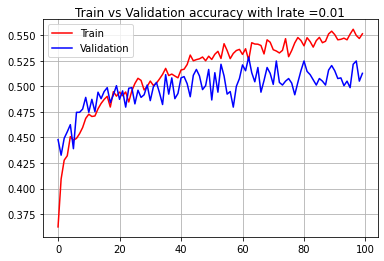

In [ ]:
# plot accuracy
import matplotlib.pyplot as plt
plt.plot( history.history['accuracy'], label ='Train', color = 'r')
plt.plot( history.history ['val_accuracy'], label ='Validation', color = 'b')
plt.grid()
plt.legend()
plt.title ('Train vs Validation accuracy with lrate ='+ str(lrate) , pad = -50)

**We can observe that both the curves for train and test and close, so we have avoided overfitting  using Dropout=0.5 and weight regularizer**

# Graphical analysis of train and test loss


Text(0.5, 1.0, 'Train vs Validation loss with lrate =0.01')

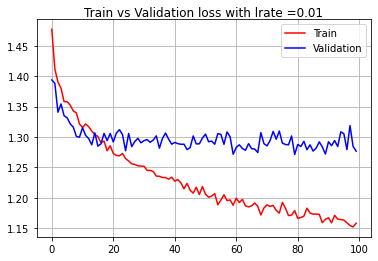

In [ ]:
# plot loss
plt.plot( history.history['loss'], label ='Train', color = 'r')
plt.plot( history.history ['val_loss'], label ='Validation', color = 'b')
plt.grid()
plt.legend()
plt.title ('Train vs Validation loss with lrate ='+ str(lrate) , pad = -50)

**We can observe that both the curves for train and test and close, so we have avoided overfitting  using Dropout=0.5 and weight regularizer**

 **Hence, we have obtained **

*   **Test Accuracy:-  0.5039920210838318**
*   **Test Loss:-  1.284095048904419**


